In [1]:
import cached_functions
import inspect


In [2]:
from PIL import Image, ImageOps
from matplotlib import cm
import numpy as np

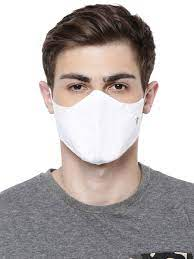

In [3]:
oldim = Image.open("mask.jpg", )
oldim

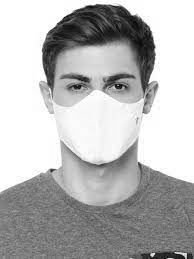

In [4]:
oldim = ImageOps.grayscale(oldim)
oldim

In [5]:
oldim = np.array(oldim)/255.

In [6]:
print(inspect.getsource(cached_functions.convolution))

def convolution(img:  np.ndarray, detector: np.ndarray) -> np.ndarray:
    """
        Convolution d'une image par une matrice detectrice
        @param: <img>:np.ndarray ; l'image au format numpy
        @param: <detector>:np.ndarray ; la matrice detectrice au format numpy
        @return: <img_out>:np.ndarray ; la convolution de img par detector
    """
    assert(detector.shape[0]%2==1 and detector.shape[1]%2==1),\
        f"Filtre de taille paire: {detector.shape[0]}x{detector.shape[1]}"
    n, m = img.shape
    d = detector.shape
    h_conv = np.floor(n + - d[0] ).astype(int) + 1
    w_conv = np.floor(m + - d[1] ).astype(int) + 1
    img_out = np.zeros((h_conv, w_conv))
    b = d[0] // 2, d[1] // 2
    center_w = b[0] * 1
    center_h = b[1] * 1
    
    for i in range(h_conv):
        center_x = center_w + i * 1
        indices_x = [center_x + l * 1 for l in range(-b[0], b[0] + 1)]
        for j in range(w_conv):
            center_y = center_h + j * 1
            indices_y = [ce

In [7]:
filtre_coins = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

filtre_vertical1 = np.array([[-1, 1, 0],
                           [-1, 1, 0],
                           [-1, 1, 0]])

filtre_vertical2 = np.array([[0, 1, -1],
                           [0, 1, -1],
                           [0, 1, -1]])

filtre_horizontal1 = np.array([[-1, -1, -1],
                              [1, 1, 1],
                              [0, 0, 0]])

filtre_horizontal2 = np.array([[0, 0, 0],
                              [1, 1, 1],
                              [-1, -1, -1]])

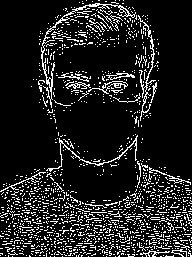

In [8]:
nimg = cached_functions.convolution(oldim, filtre_coins)*5.
PIL_image = Image.fromarray(np.uint8(nimg))
PIL_image

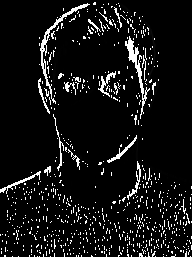

In [9]:
nimg = cached_functions.convolution(oldim, filtre_vertical1)*10.
PIL_image = Image.fromarray(np.uint8(nimg))
PIL_image


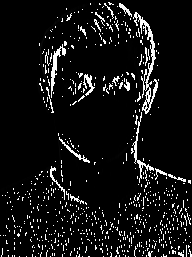

In [10]:
nimg = cached_functions.convolution(oldim, filtre_vertical2)*10.
PIL_image = Image.fromarray(np.uint8(nimg))
PIL_image

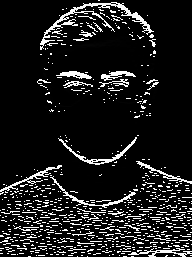

In [11]:
nimg = cached_functions.convolution(oldim, filtre_horizontal1)*10.
PIL_image = Image.fromarray(np.uint8(nimg))
PIL_image

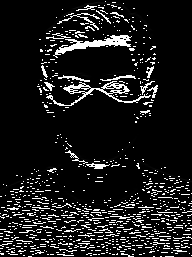

In [12]:
nimg = cached_functions.convolution(oldim, filtre_horizontal2)*10.
PIL_image = Image.fromarray(np.uint8(nimg))
PIL_image